In [7]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%pylab inline
import warnings
from scipy import stats
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


C:\Users\Krain\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [338]:
data = pd.read_csv('credit_train.csv', encoding= "1251", sep = ';')
data.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,48,MAR,UMN,"59998,00",10,1.6,"0,770249",GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,2,F,28,MAR,UMN,"10889,00",6,1.1,"0,248514",GRD,МОСКВА,43000.0,2.0,0.0,0
2,3,M,32,MAR,SPC,"10728,00",12,1.1,"0,459589",SCH,ОБЛ САРАТОВСКАЯ,23000.0,5.0,0.0,0
3,4,F,27,DIV,SPC,"12009,09",12,1.1,"0,362536",GRD,ОБЛ ВОЛГОГРАДСКАЯ,17000.0,2.0,0.0,0
4,5,M,45,MAR,SPC,"16908,89",10,1.1,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,25000.0,1.0,0.0,0


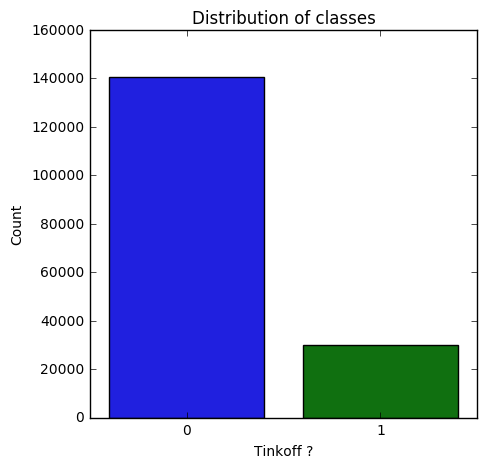

Percentage of 1-st class: Prct = 17.599999999999998


In [137]:
plt.figure(figsize(5,5))
sns.countplot(data = data, x = 'open_account_flg')
plt.title('Distribution of classes')
plt.xlabel('Tinkoff ?')
plt.ylabel('Count')
plt.savefig("classes.jpg")
plt.show()
print('Percentage of 1-st class: Prct = {}'.format(100 * round(data.open_account_flg.value_counts()[1] / data.shape[0], 3)))

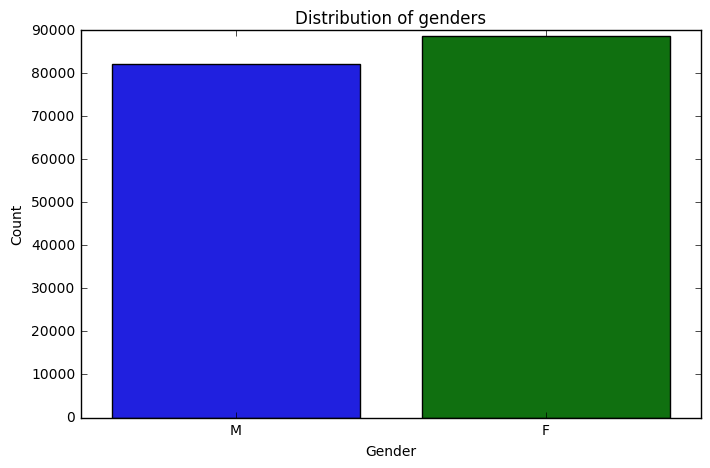

In [148]:
plt.figure(figsize(8,5))
sns.countplot(data = data, x = 'gender')
plt.title('Distribution of genders')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.savefig('Gender hist')
plt.show()

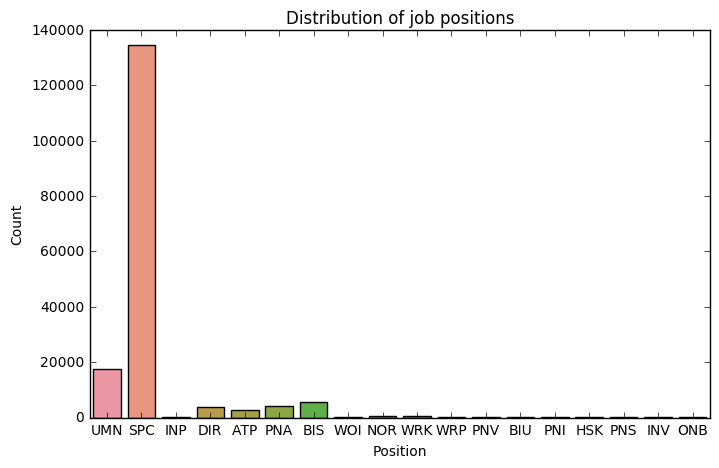

In [149]:
plt.figure(figsize(8,5))
sns.countplot(data = data, x = 'job_position')
plt.title('Distribution of job positions')
plt.ylabel('Count')
plt.xlabel('Position')
plt.savefig('job position hist')
plt.show()

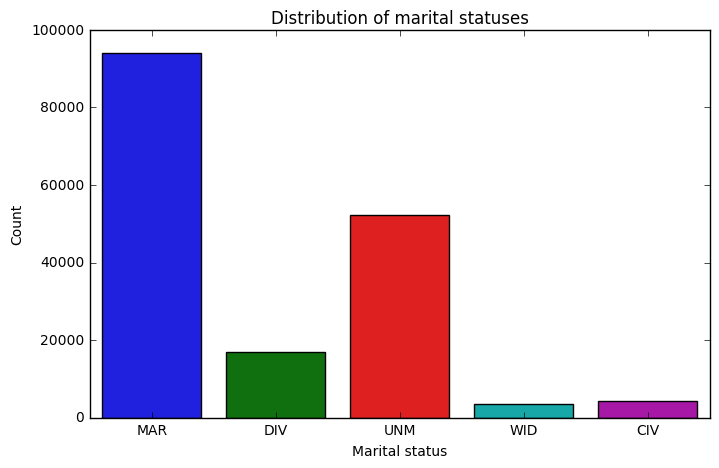

In [150]:
plt.figure(figsize(8,5))
sns.countplot(data = data, x = 'marital_status')
plt.title('Distribution of marital statuses')
plt.ylabel('Count')
plt.xlabel('Marital status')
plt.savefig('marital status hist')
plt.show()

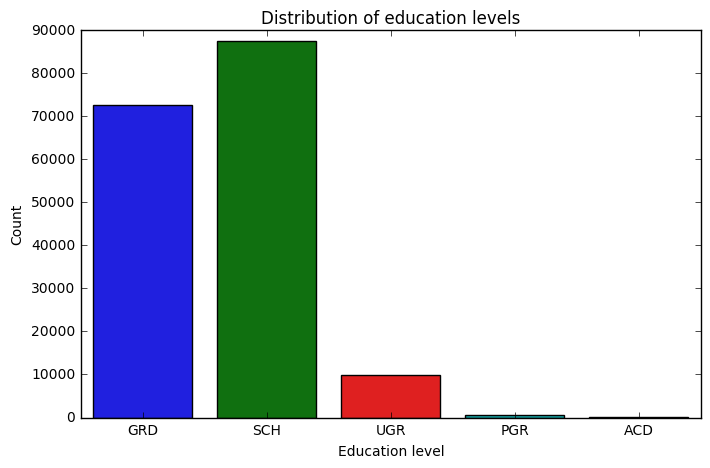

In [151]:
plt.figure(figsize(8,5))
sns.countplot(data = data, x = 'education')
plt.title('Distribution of education levels')
plt.ylabel('Count')
plt.xlabel('Education level')
plt.savefig('education hist')
plt.show()

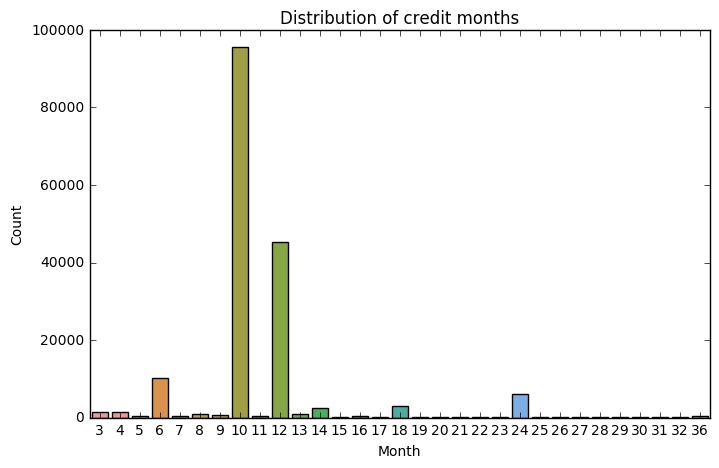

In [255]:
plt.figure(figsize(8,5))
sns.countplot(data = data, x = 'credit_month')
plt.title('Distribution of credit months')
plt.ylabel('Count')
plt.xlabel('Month')
plt.savefig('credit months hist')
plt.show()

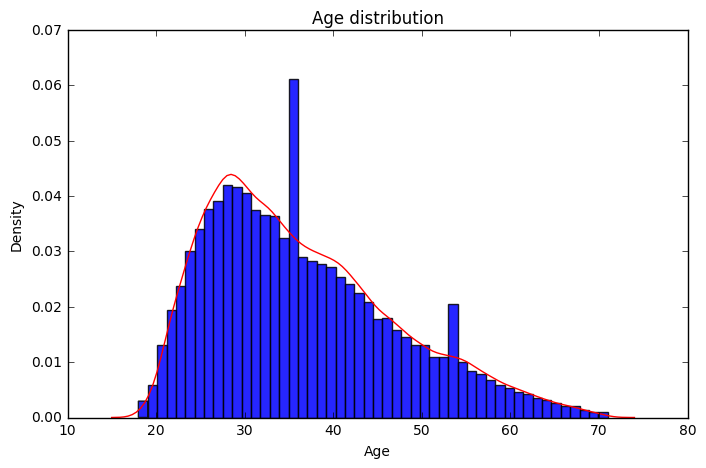

In [171]:
plt.figure(figsize(8,5))
sns.distplot( data.age, hist = True, color= 'red', hist_kws={"alpha": 0.85,"color": 'blue'})
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.savefig('age distribution')
plt.show()

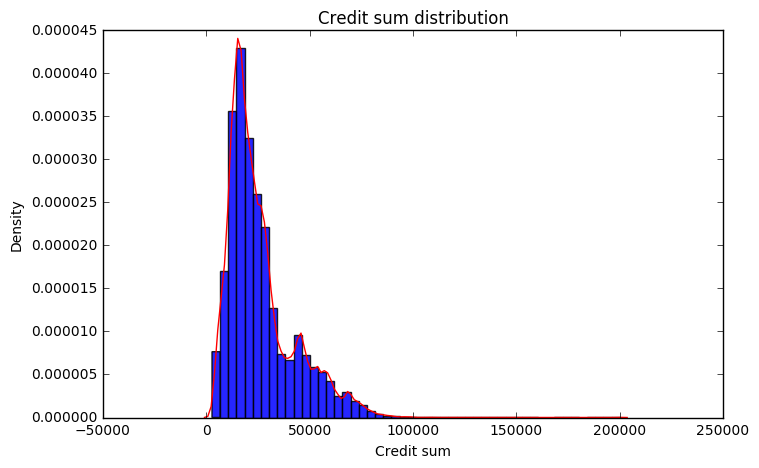

In [188]:
plt.figure(figsize(8,5))
sns.distplot(data.credit_sum, hist = True, color= 'red', hist_kws={"alpha": 0.85,"color": 'blue'})
plt.title('Credit sum distribution')
plt.xlabel('Credit sum')
plt.ylabel('Density')
plt.savefig('Credit sum distribution')
plt.show()

In [202]:
data.monthly_income = data.monthly_income.fillna(data.monthly_income.mean())

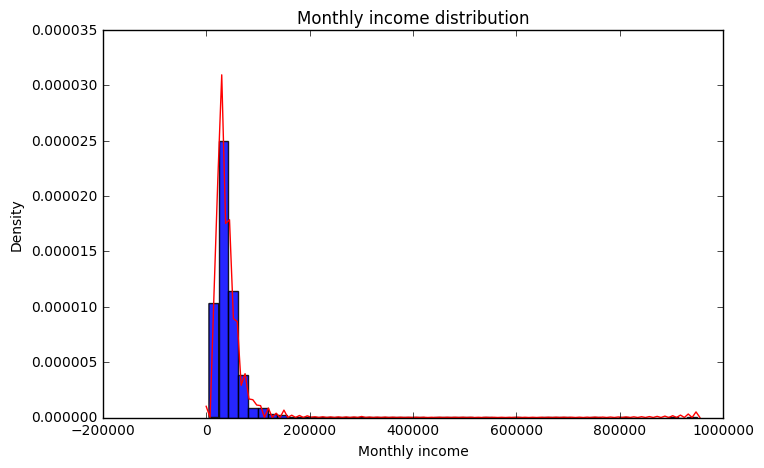

In [207]:
plt.figure(figsize(8,5))
sns.distplot(data.monthly_income, hist = True, color= 'red', hist_kws={"alpha": 0.85,"color": 'blue'}, bins = 50)
plt.title('Monthly income distribution')
plt.xlabel('Monthly income')
plt.ylabel('Density')
plt.savefig('Monthly income distribution')
plt.show()

In [214]:
print("Число уникальных клиентов: {}, Число заявок в выборке: {}, Нет случаев нескольких заявок от одного клиента: {}".format(data.client_id.nunique(), data.shape[0], data.client_id.nunique() == data.shape[0]))

Число уникальных клиентов: 170746, Число заявок в выборке: 170746, Нет случаев нескольких заявок от одного клиента: True


In [210]:
data[data.credit_count.isnull()]

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
25,26,F,22,UNM,SPC,30000.00,18,1.10,0.550770,UGR,РЕСП. БАШКОРТОСТАН,30000.0,NaN,NaN,1
50,51,F,35,MAR,SPC,13779.00,10,1.60,0.677837,GRD,ОБЛ НОВОСИБИРСКАЯ,28000.0,NaN,NaN,0
52,53,F,33,DIV,DIR,15379.20,10,1.22,0.566717,GRD,САНКТ-ПЕТЕРБУРГ,60000.0,NaN,NaN,0
72,73,M,21,UNM,ATP,14309.00,10,1.10,0.293619,SCH,МОСКВА,30000.0,NaN,NaN,1
74,75,F,27,MAR,SPC,15248.00,10,1.60,0.591578,SCH,ОРЕНБУРГСКАЯ ОБЛ,10000.0,NaN,NaN,0
87,88,F,25,MAR,SPC,20683.00,10,1.32,0.504309,SCH,РОСТОВСКАЯ ОБЛ,30000.0,NaN,NaN,1
94,95,M,26,UNM,SPC,26088.00,10,1.60,0.756208,GRD,КРАСНОЯРСКИЙ КРАЙ,25000.0,NaN,NaN,0
138,139,M,48,MAR,SPC,10159.00,10,1.60,0.661510,SCH,СТАВРОПОЛЬСКИЙ КРАЙ,25500.0,NaN,NaN,0
153,154,F,23,UNM,SPC,30431.11,10,1.60,0.725202,GRD,ОБЛ БЕЛГОРОДСКАЯ,15000.0,NaN,NaN,0
154,155,F,53,MAR,SPC,7379.00,6,1.40,0.569212,UGR,ОБЛ ПСКОВСКАЯ,57000.0,NaN,NaN,0


In [218]:
data[(data.credit_count.isnull())].open_account_flg.value_counts(normalize = True)

0    0.626327
1    0.373673
Name: open_account_flg, dtype: float64

In [221]:
data.columns

Index(['client_id', 'gender', 'age', 'marital_status', 'job_position',
       'credit_sum', 'credit_month', 'tariff_id', 'score_shk', 'education',
       'living_region', 'monthly_income', 'credit_count',
       'overdue_credit_count', 'open_account_flg'],
      dtype='object')

In [237]:
print('% of NaNs:\n')
for i in data.columns:
    print(i, round(data[data[i].isnull()].shape[0] / data.shape[0], 4), "\n" )

% of NaNs:

client_id 0.0 

gender 0.0 

age 0.0 

marital_status 0.0 

job_position 0.0 

credit_sum 0.0 

credit_month 0.0 

tariff_id 0.0 

score_shk 0.0 

education 0.0 

living_region 0.0011 

monthly_income 0.0 

credit_count 0.0541 

overdue_credit_count 0.0541 

open_account_flg 0.0 



In [343]:
data.credit_count = data.credit_count.fillna(data.credit_count.median())

In [344]:
data.overdue_credit_count = data.overdue_credit_count.fillna(data.overdue_credit_count.median())

In [345]:
data.living_region = data.living_region.fillna(data.living_region.mode()[0])

In [250]:
print('% of NaNs:\n')
for i in data.columns:
    print(i, round(data[data[i].isnull()].shape[0] / data.shape[0], 4), "\n" )

% of NaNs:

client_id 0.0 

gender 0.0 

age 0.0 

marital_status 0.0 

job_position 0.0 

credit_sum 0.0 

credit_month 0.0 

tariff_id 0.0 

score_shk 0.0 

education 0.0 

living_region 0.0 

monthly_income 0.0 

credit_count 0.0 

overdue_credit_count 0.0 

open_account_flg 0.0 



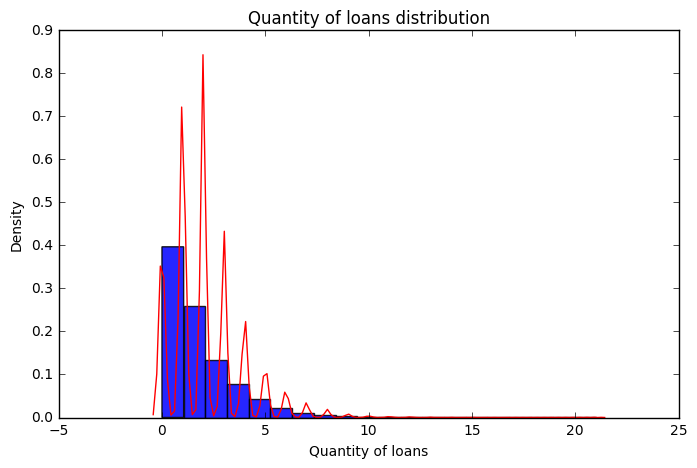

In [254]:
plt.figure(figsize(8,5))
sns.distplot(data.credit_count, hist = True, color= 'red', hist_kws={"alpha": 0.85,"color": 'blue'}, bins = 20)
plt.title('Quantity of loans distribution')
plt.xlabel('Quantity of loans')
plt.ylabel('Density')
plt.savefig('qnt of credits distribution')
plt.show()

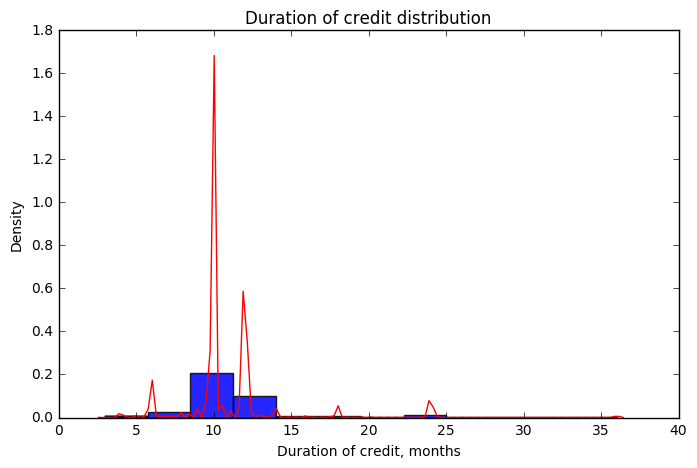

In [265]:
plt.figure(figsize(8,5))
sns.distplot(data.credit_month, hist = True, color= 'red', hist_kws={"alpha": 0.85,"color": 'blue'}, bins = 12)
plt.title('Duration of credit distribution')
plt.xlabel('Duration of credit, months')
plt.ylabel('Density')
plt.savefig('credit months dist')
plt.show()

In [175]:
import re

In [339]:
data.credit_sum = list(map(lambda x: re.sub(',', '.', str(x)), data.credit_sum ))

In [340]:
data.score_shk = list(map(lambda x: re.sub(',', '.', str(x)), data.score_shk))

In [341]:
data.credit_sum = data.credit_sum.astype('float64')

In [342]:
data.score_shk = data.score_shk.astype('float64')

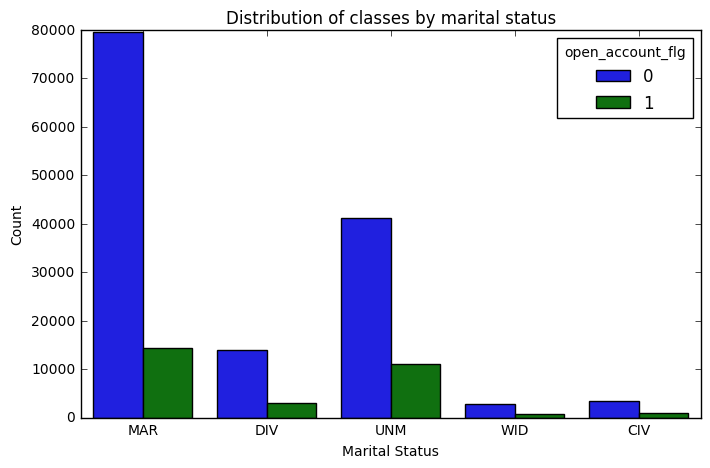

In [143]:
plt.figure(figsize(8,5))
sns.countplot(data = data, hue = 'open_account_flg', x = 'marital_status')
plt.title('Distribution of classes by marital status')
plt.ylabel('Count')
plt.xlabel('Marital Status')
plt.savefig('Distribution by marital status')
plt.show()

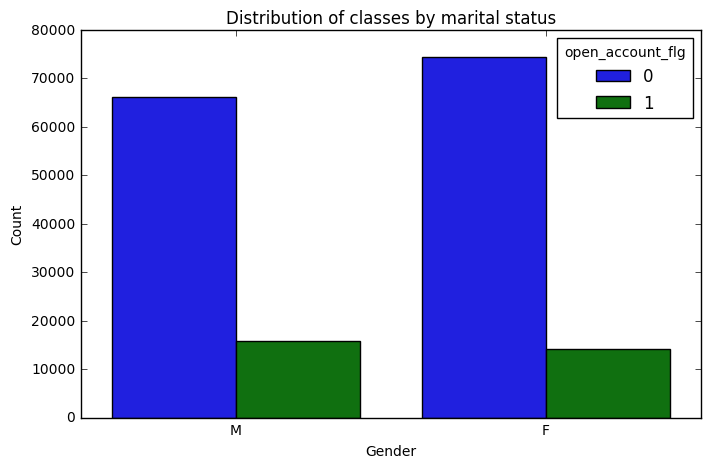

In [144]:
plt.figure(figsize(8,5))
sns.countplot(data = data, hue = 'open_account_flg', x = 'gender')
plt.title('Distribution of classes by marital status')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.savefig('Distribution by gender')
plt.show()

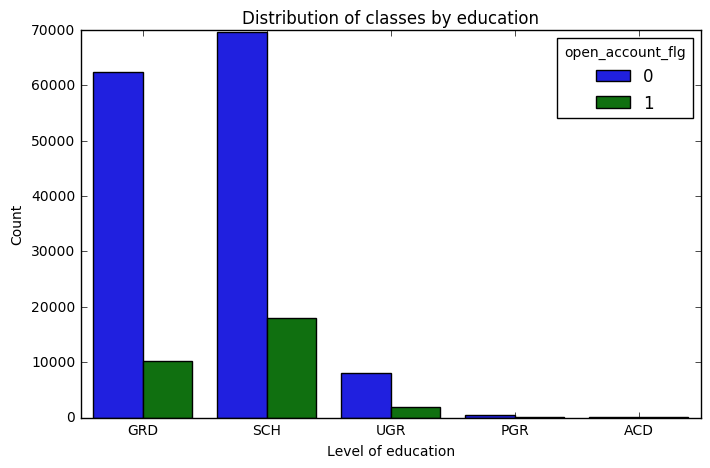

In [145]:
plt.figure(figsize(8,5))
sns.countplot(data = data, hue = 'open_account_flg', x = 'education')
plt.title('Distribution of classes by education')
plt.ylabel('Count')
plt.xlabel('Level of education')
plt.savefig('Distribution by education')
plt.show()

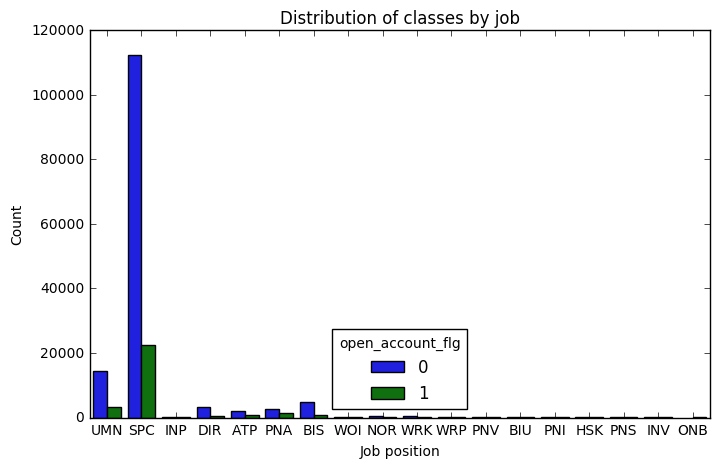

In [146]:
plt.figure(figsize(8,5))
sns.countplot(data = data, hue = 'open_account_flg', x = 'job_position')
plt.title('Distribution of classes by job')
plt.ylabel('Count')
plt.xlabel('Job position')
plt.savefig('Distribution by job')
plt.show()

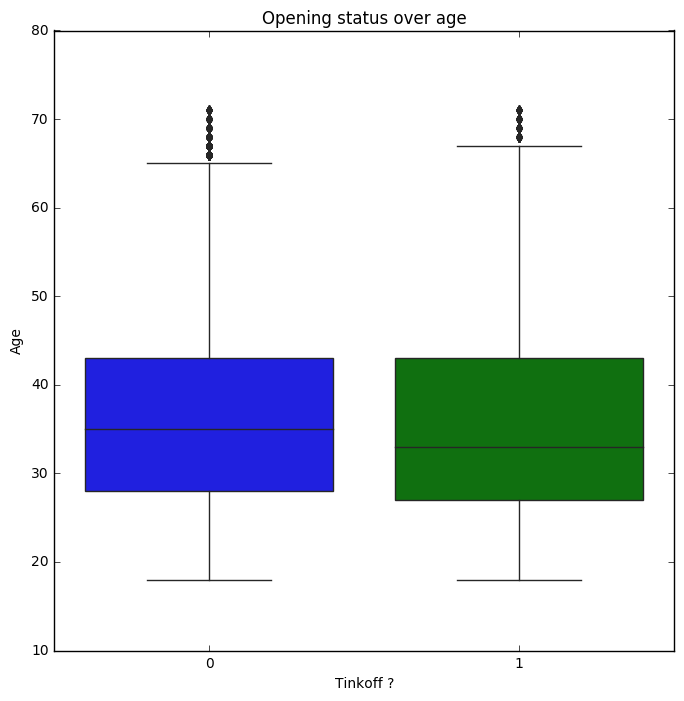

In [271]:
plt.figure(figsize(8,8))
sns.boxplot(data = data, y = 'age', x = 'open_account_flg')
plt.title('Opening status over age')
plt.ylabel('Age')
plt.xlabel('Tinkoff ?')
plt.savefig('box plot for age')
plt.show()

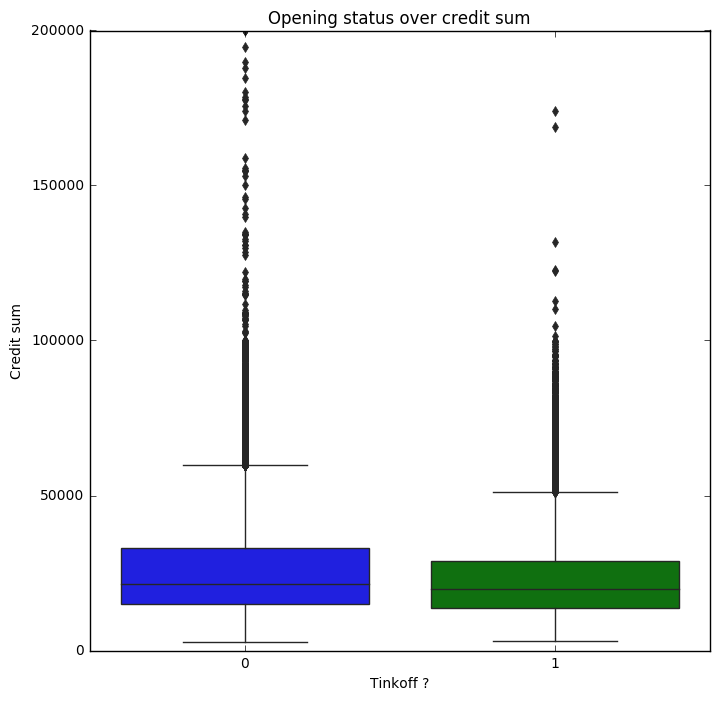

In [272]:
plt.figure(figsize(8,8))
sns.boxplot(data = data, y = 'credit_sum', x = 'open_account_flg')
plt.title('Opening status over credit sum')
plt.ylabel('Credit sum')
plt.xlabel('Tinkoff ?')
plt.savefig('box plot for credit sum')
plt.show()

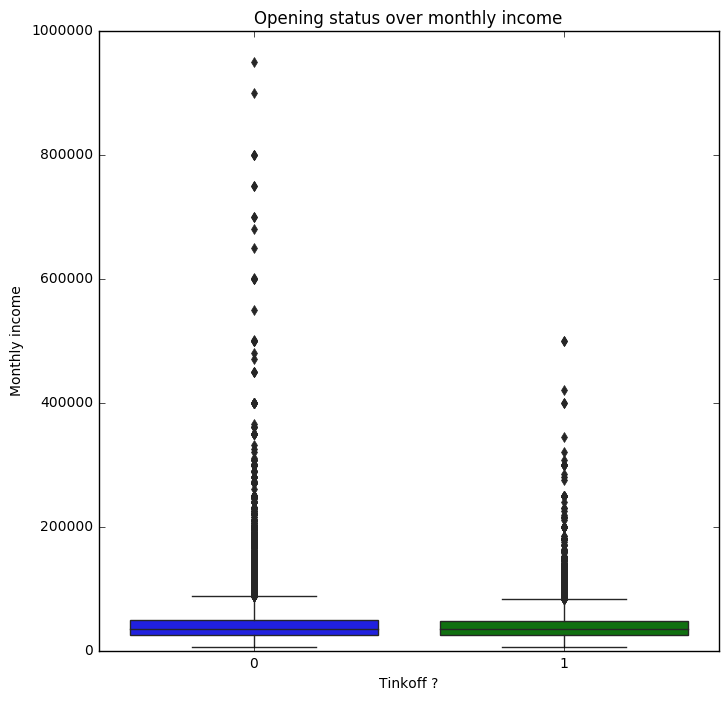

In [273]:
plt.figure(figsize(8,8))
sns.boxplot(data = data, y = 'monthly_income', x = 'open_account_flg')
plt.title('Opening status over monthly income')
plt.ylabel('Monthly income')
plt.xlabel('Tinkoff ?')
plt.savefig('box plot for monthly income')
plt.show()

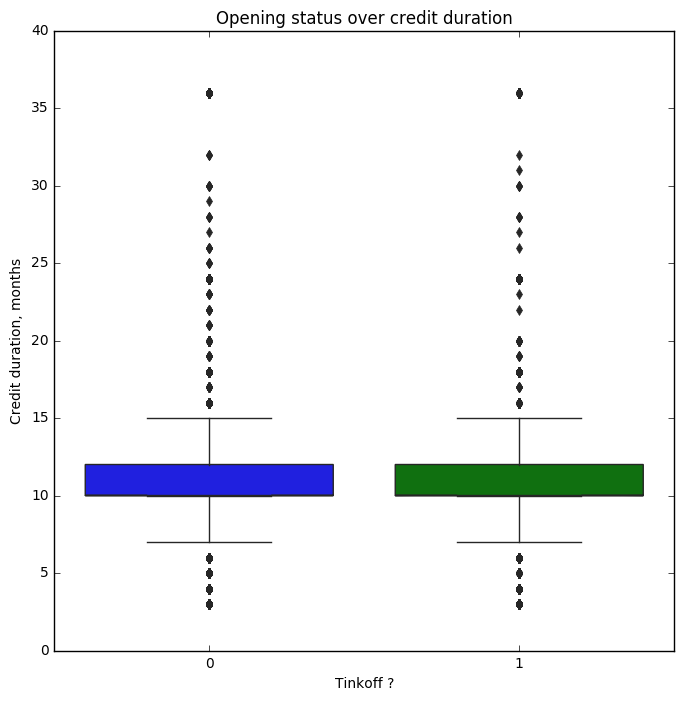

In [281]:
plt.figure(figsize(8,8))
sns.boxplot(data = data, y = 'credit_month', x = 'open_account_flg',  notch= True)
plt.title('Opening status over credit duration')
plt.ylabel('Credit duration, months')
plt.xlabel('Tinkoff ?')
plt.savefig('box plot for credit duration')
plt.show()

In [274]:
data.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,48,MAR,UMN,59998.00,10,1.6,0.770249,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,2,F,28,MAR,UMN,10889.00,6,1.1,0.248514,GRD,МОСКВА,43000.0,2.0,0.0,0
2,3,M,32,MAR,SPC,10728.00,12,1.1,0.459589,SCH,ОБЛ САРАТОВСКАЯ,23000.0,5.0,0.0,0
3,4,F,27,DIV,SPC,12009.09,12,1.1,0.362536,GRD,ОБЛ ВОЛГОГРАДСКАЯ,17000.0,2.0,0.0,0
4,5,M,45,MAR,SPC,16908.89,10,1.1,0.421385,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,25000.0,1.0,0.0,0


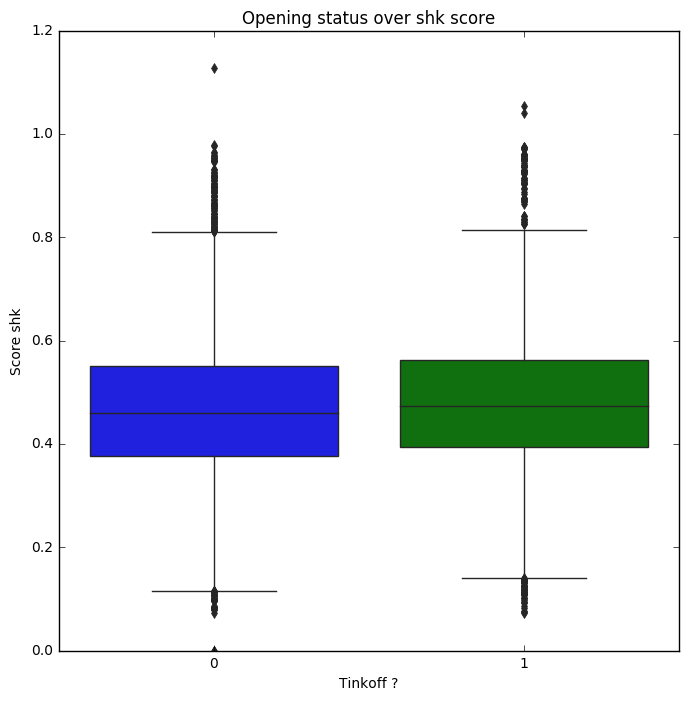

In [285]:
plt.figure(figsize(8,8))
sns.boxplot(data = data, y = 'score_shk', x = 'open_account_flg')
plt.title('Opening status over shk score')
plt.ylabel('Score shk')
plt.xlabel('Tinkoff ?')
plt.savefig('box plot for shk score')
plt.show()

In [298]:
target_gender_cross = pd.crosstab(data.open_account_flg, data.gender)
target_gender_cross

gender,F,M
open_account_flg,,
0,74522,66168
1,14175,15881


In [299]:
target_education_cross = pd.crosstab(data.open_account_flg, data.education)
target_education_cross

education,ACD,GRD,PGR,SCH,UGR
open_account_flg,,,,,
0,82,62464,457,69583,8104
1,25,10130,108,17956,1837


In [300]:
target_living_area_cross = pd.crosstab(data.open_account_flg, data.living_region)
target_living_area_cross

living_region,74,98,АДЫГЕЯ РЕСП,АЛТАЙСКИЙ,АЛТАЙСКИЙ КРАЙ,АМУРСКАЯ ОБЛ,АМУРСКАЯ ОБЛАСТЬ,АО НЕНЕЦКИЙ,АО ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - Ю,АО ЯМАЛО-НЕНЕЦКИЙ,...,ЧУВАШИЯ ЧУВАШСКАЯ РЕСПУБЛИКА -,ЧУВАШСКАЯ - ЧУВАШИЯ РЕСП,ЧУВАШСКАЯ РЕСП,ЧУВАШСКАЯ РЕСПУБЛИКА,ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ,ЧУКОТСКИЙ АО,ЭВЕНКИЙСКИЙ АО,ЯМАЛО-НЕНЕЦКИЙ АО,ЯРОСЛАВСКАЯ ОБЛ,ЯРОСЛАВСКАЯ ОБЛАСТЬ
open_account_flg,,,,,,,,,,,,,,,,,,,,,
0,1,1,9,0,5,10,18,18,487,122,...,43,52,1,233,411,8,0,1448,468,266
1,0,0,0,2,3,2,2,2,72,19,...,12,16,0,49,103,24,1,365,83,56


In [301]:
target_marital_cross = pd.crosstab(data.open_account_flg, data.marital_status)
target_marital_cross

marital_status,CIV,DIV,MAR,UNM,WID
open_account_flg,,,,,
0,3350,13880,79588,41133,2739
1,846,3090,14368,11016,736


In [302]:
target_job_cross = pd.crosstab(data.open_account_flg, data.job_position)
target_job_cross

job_position,ATP,BIS,BIU,DIR,HSK,INP,INV,NOR,ONB,PNA,PNI,PNS,PNV,SPC,UMN,WOI,WRK,WRP
open_account_flg,,,,,,,,,,,,,,,,,,
0,1984,4706,80,3195,6,174,1,343,0,2618,45,6,31,112277,14334,268,535,87
1,807,885,46,555,2,67,4,194,1,1489,20,6,9,22403,3340,84,121,23


In [ ]:
# test different

In [346]:
data['annuity'] = data.credit_sum / data.credit_month

In [347]:
data['rel_annuity_to_monthly_income'] = data.annuity / data.monthly_income

In [348]:
low_frequency_job_positions = list(data.job_position.value_counts(normalize= True)[data.job_position.value_counts(normalize= True) < 0.01].index)

In [349]:
data.job_position = data.job_position.replace(low_frequency_job_positions, 'OTHR')

In [353]:
low_frequency_education = list(data.education.value_counts(normalize= True)[data.education.value_counts(normalize= True) < 0.01].index)

In [354]:
data.education = data.education.replace(low_frequency_education, 'OTHR')

In [375]:
data.living_region = list(map(lambda x: re.sub('ОБЛ$', 'ОБЛАСТЬ', x), data.living_region))

In [378]:
data.living_region = list(map(lambda x: re.sub('РЕСП$', 'РЕСПУБЛИКА', x), data.living_region))

In [386]:
data.living_region = list(map(lambda x: re.sub('Г$', '', x), data.living_region))

In [364]:
low_frequency_region = data.living_region.value_counts()[data.living_region.value_counts() < 100].index.tolist()

In [365]:
data.living_region = data.living_region.replace(low_frequency_region, 'OTHR')

In [ ]:
low_frequency_tariff = data.tariff_id.value_counts()[data.tariff_id.value_counts() < 100].index.tolist()

In [435]:
data.tariff_id = data.tariff_id.replace(low_frequency_tariff, 1.0)

In [407]:
data['position_median'] = data.groupby('job_position')['monthly_income'].transform('median')

In [410]:
data['education_median'] = data.groupby('education')['monthly_income'].transform('median')

In [418]:
data['region_median'] = data.groupby('living_region')['monthly_income'].transform('median')

In [419]:
data['marital_median'] = data.groupby('marital_status')['monthly_income'].transform('median')

In [421]:
data['inc_rel_position'] = data.monthly_income / data.position_median
data['inc_rel_education'] = data.monthly_income / data.education_median
data['inc_rel_region'] = data.monthly_income / data.region_median
data['inc_rel_marital'] = data.monthly_income / data.marital_median

In [422]:
data['credit_position_median'] = data.groupby('job_position')['credit_sum'].transform('median')
data['credit_education_median'] = data.groupby('education')['credit_sum'].transform('median')
data['credit_region_median'] = data.groupby('living_region')['credit_sum'].transform('median')
data['credit_marital_median'] = data.groupby('marital_status')['credit_sum'].transform('median')

In [423]:
data['cr_rel_position'] = data.credit_sum / data.credit_position_median
data['cr_rel_education'] = data.credit_sum / data.credit_education_median
data['cr_rel_region'] = data.credit_sum / data.credit_region_median
data['cr_rel_marital'] = data.credit_sum / data.credit_marital_median

In [424]:
del_list = ['position_median', 'region_median', 'marital_median', 'education_median', 'credit_position_median', 'credit_marital_median',
           'credit_education_median', 'credit_region_median']

for i in del_list:
    del data[i]

In [441]:
categorical_list = ['gender', 'marital_status', 'education', 'living_region', 'job_position']
continious_list = list(set(data.columns - categorical_list - ['client_id','open_account_flg']))

C:\Users\Krain\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  from ipykernel import kernelapp as app


In [450]:
from sklearn.preprocessing import StandardScaler

In [522]:
from sklearn.model_selection import train_test_split

In [523]:
from sklearn.cross_validation import cross_val_score, KFold

C:\Users\Krain\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [303]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [444]:
Y = data.open_account_flg

In [445]:
del data['open_account_flg']

In [447]:
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.33, random_state=81)

In [449]:
X_train_continious = X_train[continious_list]
X_test_continious = X_test[continious_list]

In [452]:
scaler = StandardScaler()

In [456]:
for k in X_train_continious.columns:
    X_train_continious[k] = X_train_continious[k].fillna(X_train_continious[k].median())

C:\Users\Krain\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [459]:
%%time
X_train_continious = scaler.fit_transform(X_train_continious)

Wall time: 301 ms


In [460]:
X_test_continious = scaler.transform(X_test_continious)

In [463]:
X_train_categorical, X_test_categorical = X_train[categorical_list], X_test[categorical_list]

In [476]:
X_train_categorical = pd.get_dummies(X_train_categorical)
X_test_categorical = pd.get_dummies(X_test_categorical)

In [483]:
X_train_continious = pd.DataFrame(X_train_continious, columns= continious_list)
X_test_continious = pd.DataFrame(X_test_continious, columns= continious_list)

In [499]:
X_train_categorical = X_train_categorical.set_index(np.arange(0, X_train_categorical.shape[0]))
X_test_categorical = X_test_categorical.set_index(np.arange(0, X_test_categorical.shape[0]))

In [502]:
X_train = pd.concat([X_train_continious, X_train_categorical], axis=1)
X_test = pd.concat([X_test_continious, X_test_categorical], axis=1)

In [556]:
def train_cv_model(data, target, clf, parameter, parameter_plus, folds =5, random_seed = 81, metrics = 'roc_auc'):
    
    if clf == 'Ridge':
        model = RidgeClassifier(alpha = parameter)
        
    elif clf == 'RF':
        model = RandomForestClassifier(n_estimators= parameter, max_depth= parameter_plus, random_state= random_seed)
        
    elif clf == 'Tree':
        model = DecisionTreeClassifier(max_depth= parameter, random_state= random_seed, criterion='entropy')
        
    elif clf == 'Logistic':
        model = LogisticRegression(fit_intercept=parameter, random_state= random_seed)

    fold = KFold(target.size, n_folds = folds, shuffle= True, random_state= random_seed)
    score = cross_val_score(model, data, target, metrics, fold)
    
    return score.mean()

In [540]:
%%time
alphas = np.power(10.0,np.arange(-3, 4))
cv_ridge_auc_results = [train_cv_model(data = X_train, target = y_train, clf = 'Ridge', parameter = i, random_seed= 81, metrics= 'roc_auc') for i in alphas]

Wall time: 25.2 s


In [544]:
%%time
fit_intercept_param = [True, False]
cv_logistic_auc_results = [train_cv_model(data = X_train, target = y_train, clf = 'Logistic', parameter = i, random_seed= 81, metrics= 'roc_auc' ) for i in fit_intercept_param]

Wall time: 39.5 s


In [550]:
%%time
max_depth_param = [2,4,8,16]
cv_tree_auc_results = [train_cv_model(data = X_train, target = y_train, clf = 'Tree', parameter = i, random_seed= 81, metrics= 'roc_auc' ) for i in max_depth_param]

Wall time: 1min 5s


In [557]:
%%time
RF_ntrees_params = [50, 100, 250]
cv_rf_auc_results = [train_cv_model(data = X_train, target = y_train, clf = 'RF', parameter = i, parameter_plus= 8, random_seed= 81, metrics= 'roc_auc' ) for i in RF_ntrees_params]

Wall time: 5min 36s


In [559]:
%%time
RF_ntrees_params = [50, 100, 250]
cv_rf_auc_results_1 = [train_cv_model(data = X_train, target = y_train, clf = 'RF', parameter = i, parameter_plus= 4, random_seed= 81, metrics= 'roc_auc' ) for i in RF_ntrees_params]

Wall time: 2min 46s


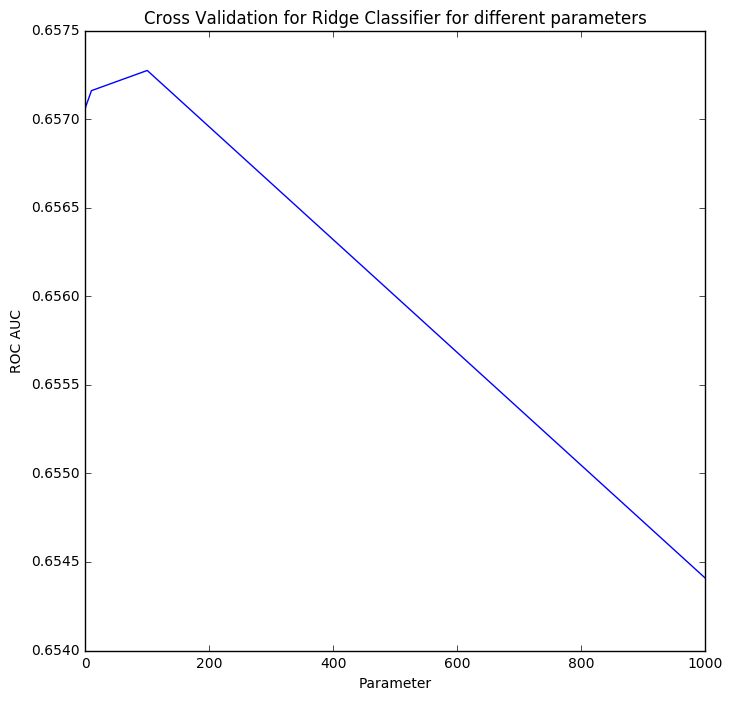

In [567]:
plt.figure(figsize(8,8))
plt.plot(alphas, cv_ridge_auc_results)
plt.title('Cross Validation for Ridge Classifier for different parameters')
plt.xlabel('Parameter')
plt.ylabel('ROC AUC')
plt.savefig('CV for Ridge')
plt.show()

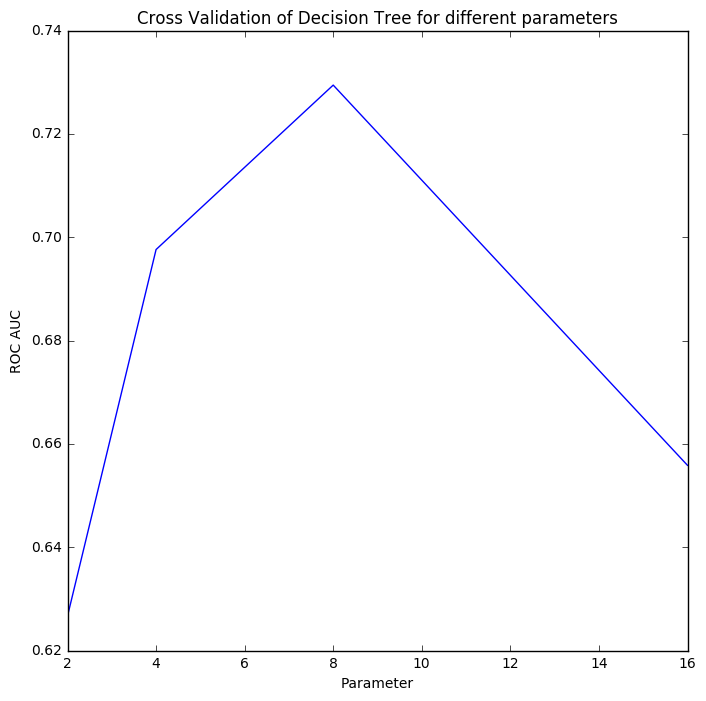

In [570]:
plt.figure(figsize(8,8))
plt.plot(max_depth_param, cv_tree_auc_results)
plt.title('Cross Validation of Decision Tree for different parameters')
plt.xlabel('Parameter')
plt.ylabel('ROC AUC')
plt.savefig('CV for tree')
plt.show()

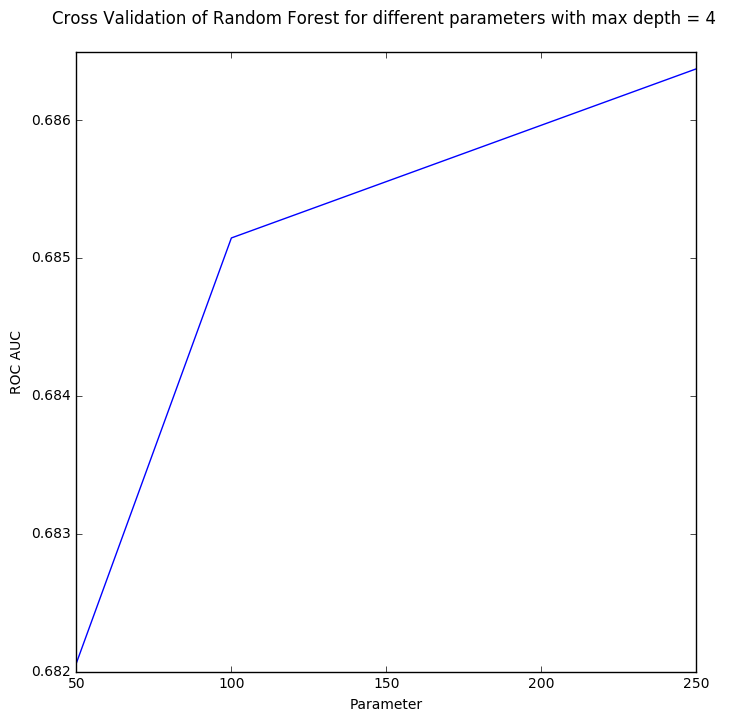

In [574]:
plt.figure(figsize(8,8))
plt.plot(RF_ntrees_params, cv_rf_auc_results_1)
plt.title('Cross Validation of Random Forest for different parameters with max depth = 4 \n')
plt.xlabel('Parameter')
plt.ylabel('ROC AUC')
plt.savefig('CV for RF_1')
plt.show()

In [577]:
Results_on_CV_by_Classifiers = [max(cv_logistic_auc_results), max(cv_ridge_auc_results), max(cv_tree_auc_results), max(cv_rf_auc_results), max(cv_rf_auc_results_1)]
Classifiers = ['Logistic', 'Ridge', 'Tree', 'RF_MD_8', 'RF_MD_4']

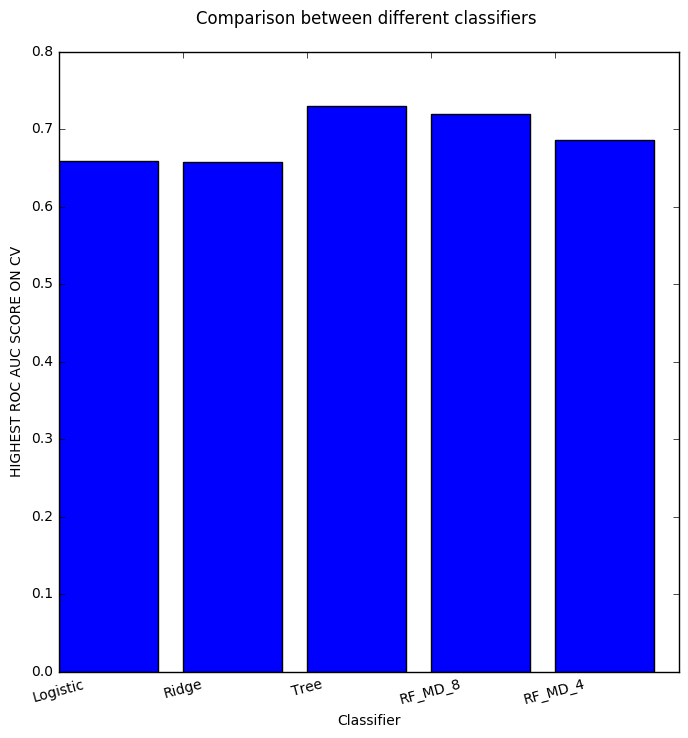

In [586]:
plt.figure(figsize(8,8))
plt.bar(height= Results_on_CV_by_Classifiers, left = np.arange(len(Results_on_CV_by_Classifiers)) )
plt.xlabel('Classifier')
plt.ylabel('HIGHEST ROC AUC SCORE ON CV')
plt.title('Comparison between different classifiers \n')
plt.xticks(np.arange(len(Results_on_CV_by_Classifiers)), Classifiers, rotation = 15)
plt.savefig('ROC AUC on different classifiers')
plt.show()

In [616]:
%%time
clf_1 = RidgeClassifier(alpha= 100, random_state= 81)
clf_1.fit(X= X_train, y = y_train)

Wall time: 730 ms


In [618]:
RidgeClassifier_Coefs = pd.DataFrame({'coefficient': clf_1.coef_.tolist()[0], 'variable': X_train.columns.tolist()})

In [620]:
RidgeClassifier_Coefs.to_csv('Ridge coefs.csv')

In [621]:
%%time
clf_2 = LogisticRegression(random_state= 81)
clf_2.fit(X = X_train, y = y_train)

Wall time: 5.5 s


In [622]:
Logistic_Classifier_Coefs = pd.DataFrame({'coefficient': clf_2.coef_.tolist()[0], 'variable': X_train.columns.tolist()})

In [625]:
Logistic_Classifier_Coefs.to_csv('logit.csv')

In [627]:
%%time
clf_3 = DecisionTreeClassifier(max_depth= 8)
clf_3.fit(X = X_train, y = y_train)

Wall time: 3.45 s


In [639]:
from sklearn.metrics import roc_auc_score, log_loss, classification_report, roc_curve, precision_recall_curve

In [642]:
Ridge_predictions = clf_1.decision_function(X_test)

In [655]:
Ridge_predictions = numpy.exp(Ridge_predictions) / (1 + numpy.exp(Ridge_predictions))

In [666]:
Roc_Curve = roc_curve(y_test, Ridge_predictions)

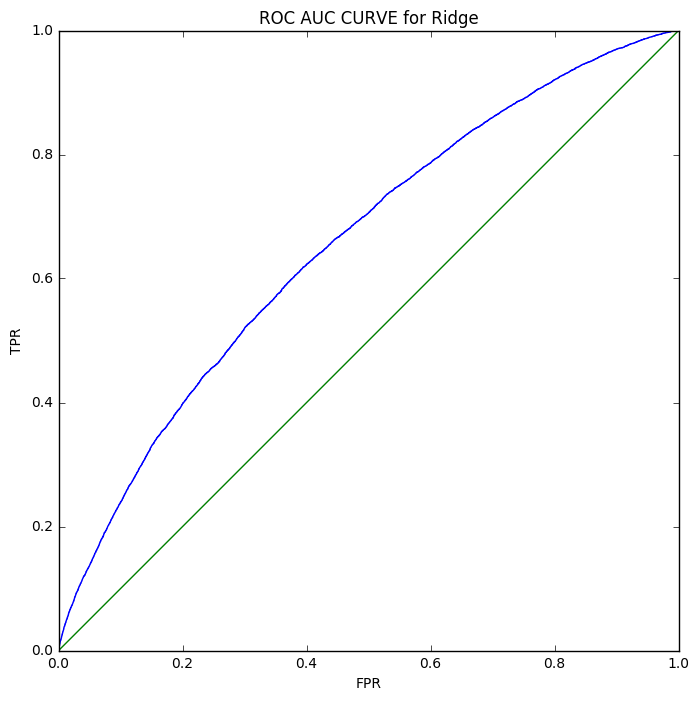

In [675]:
plt.figure(figsize(8,8))
plt.plot(Roc_Curve[0], Roc_Curve[1])
x = np.arange(0,1.1, 0.1)
y = x
plt.plot(x, y)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC CURVE for Ridge')
plt.savefig('ROC AUC CURVE for RIDGE')
plt.show()

In [676]:
Pr_Rec_Curve = precision_recall_curve(y_test, Ridge_predictions)

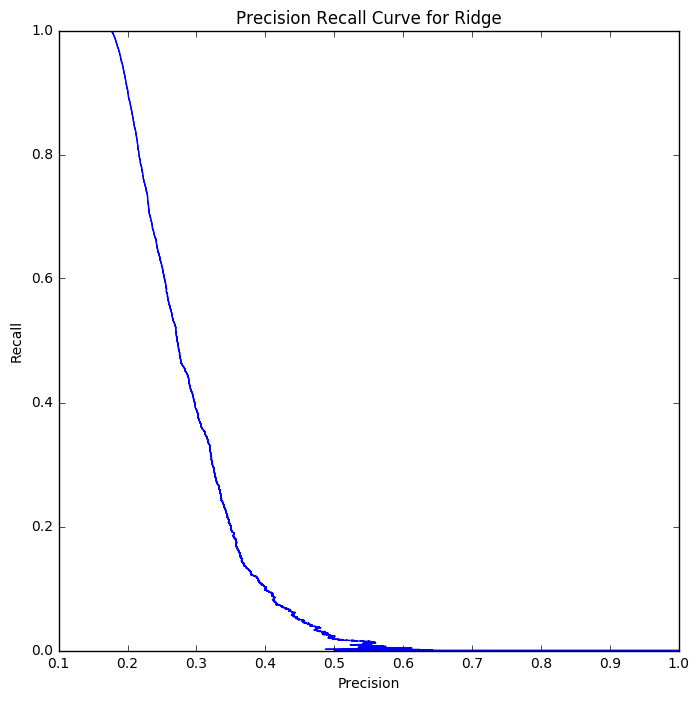

In [689]:
plt.figure(figsize(8,8))
plt.plot(Pr_Rec_Curve[0], Pr_Rec_Curve[1])
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision Recall Curve for Ridge')
plt.savefig('Precision recall curve for RIDGE')
plt.show()

In [699]:
Logistic_Predictions = clf_2.decision_function(X_test)

In [701]:
Logistic_Predictions = numpy.exp(Logistic_Predictions) / (1 + numpy.exp(Logistic_Predictions))

In [707]:
Logistic_Roc_Curve = roc_curve(y_test, Logistic_Predictions)

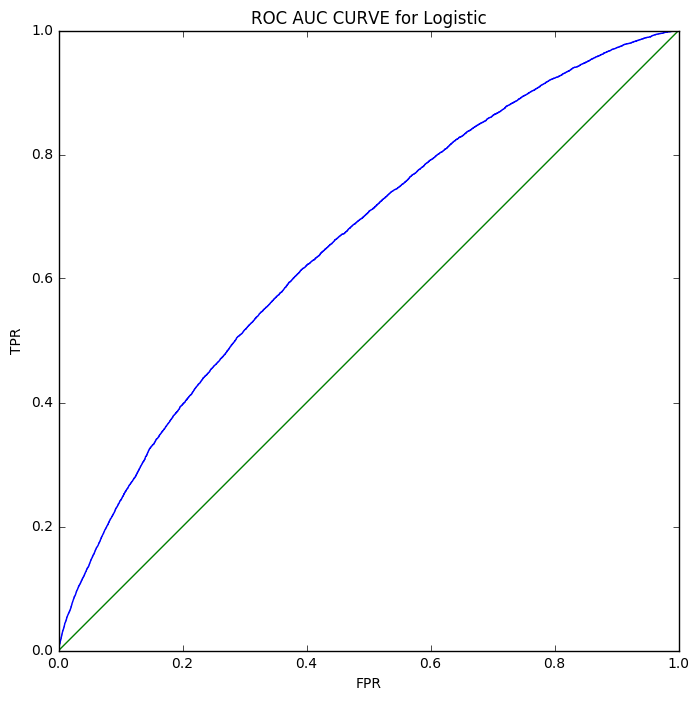

In [708]:
plt.figure(figsize(8,8))
plt.plot(Logistic_Roc_Curve[0], Logistic_Roc_Curve[1])
x = np.arange(0,1.1, 0.1)
y = x
plt.plot(x, y)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC CURVE for Logistic')
plt.savefig('ROC AUC CURVE for Logit')
plt.show()

In [709]:
Pr_Rec_Curve_Logistic = precision_recall_curve(y_test, Logistic_Predictions)

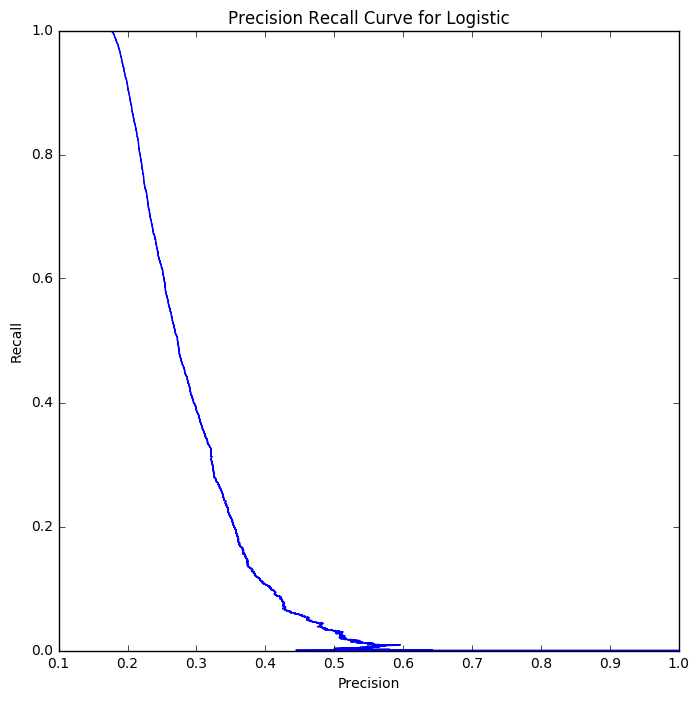

In [725]:
plt.figure(figsize(8,8))
plt.plot(Pr_Rec_Curve_Logistic[0], Pr_Rec_Curve_Logistic[1])
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision Recall Curve for Logistic')
plt.savefig('Precision recall curve for logit')
plt.show()

In [712]:
Tree_Predictions = clf_3.predict_proba(X_test)

In [719]:
Tree_Predictions = [Tree_Predictions[i][1] for i in range(Tree_Predictions.shape[0])]

In [722]:
print("Logistic: {}, Ridge: {}, Tree: {}".format(roc_auc_score(y_test, Logistic_Predictions), roc_auc_score(y_test, Ridge_predictions), roc_auc_score(y_test, Tree_Predictions)))

Logistic: 0.6560949649413796, Ridge: 0.6551519840678212, Tree: 0.7277466740036257


In [723]:
Tree_Roc_Curve = roc_curve(y_test, Tree_Predictions)

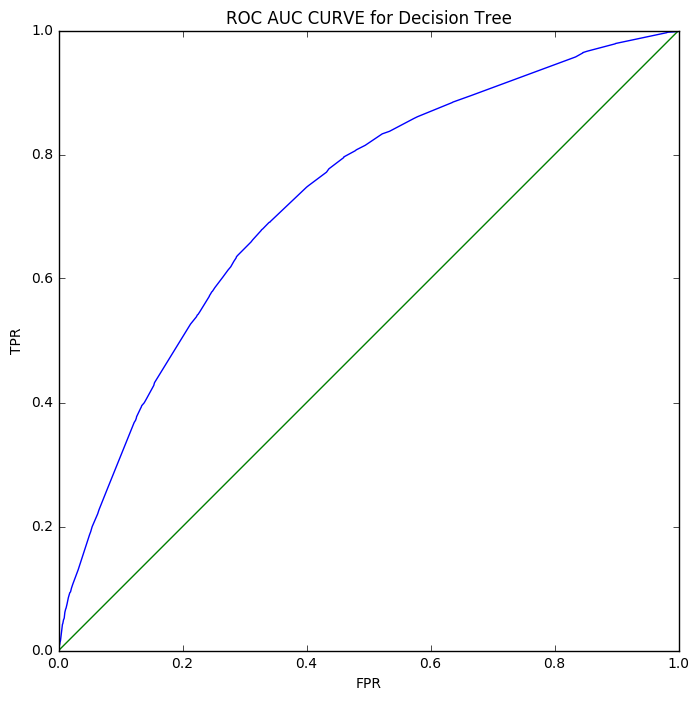

In [724]:
plt.figure(figsize(8,8))
plt.plot(Tree_Roc_Curve[0], Tree_Roc_Curve[1])
x = np.arange(0,1.1, 0.1)
y = x
plt.plot(x, y)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC CURVE for Decision Tree')
plt.savefig('ROC AUC CURVE for tree')
plt.show()

In [726]:
Pr_Rec_Curve_Tree = precision_recall_curve(y_test, Tree_Predictions)

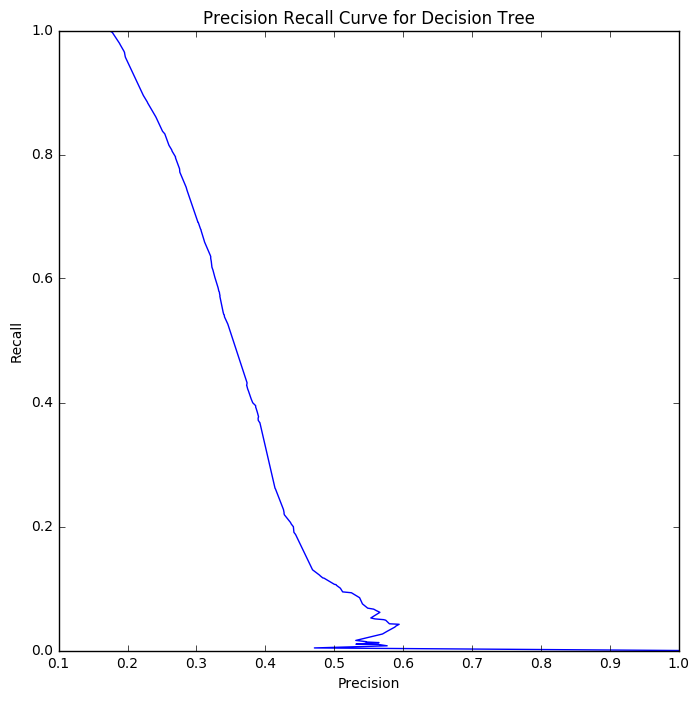

In [727]:
plt.figure(figsize(8,8))
plt.plot(Pr_Rec_Curve_Tree[0], Pr_Rec_Curve_Tree[1])
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision Recall Curve for Decision Tree')
plt.savefig('Precision recall curve for tree')
plt.show()